In [1]:
import os
import sys
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

import dotenv
import matplotlib.pyplot as plt
import torchinfo
from lightning import Trainer

from project.datasets.dummy import FashionMNISTDataModule
from project.models.dummy import FashionMNISTClassifier

In [2]:
dotenv.load_dotenv()

datasets_root = Path(os.environ.get("DATASETS_ROOT", "."))
assert datasets_root.is_dir()

In [3]:
datamodule = FashionMNISTDataModule(datasets_root)

In [4]:
model = FashionMNISTClassifier()
torchinfo.summary(model, input_size=(32, 1, 28, 28), col_names=("input_size", "output_size", "num_params", "params_percent"))

c:\Users\IIVS\anaconda3\envs\lightning-py310\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\IIVS\anaconda3\envs\lightning-py310\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
FashionMNISTClassifier                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10]                  --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 128, 26, 26]         1,280                       0.35%
│    └─BatchNorm2d: 2-2                  [32, 128, 26, 26]         [32, 128, 26, 26]         256                         0.07%
│    └─ReLU: 2-3                         [32, 128, 26, 26]         [32, 128, 26, 26]         --                             --
│    └─MaxPool2d: 2-4                    [32, 128, 26, 26]         [32, 128, 13, 13]         --                             --
│    └─Conv2d: 2-5                       [32, 128, 13, 13]         [32, 256, 11, 11]         295,168           

In [5]:
trainer = Trainer(max_epochs=10)
trainer.fit(model, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\IIVS\anaconda3\envs\lightning-py310\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
Missing logger folder: c:\Users\IIVS\Desktop\Dev\kaparoo\lightning-project-template\notebooks\lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 361 K 
---------------------------------------
361 K     Trainable params
0         Non-trainable params
361 K     Total params
1.445     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


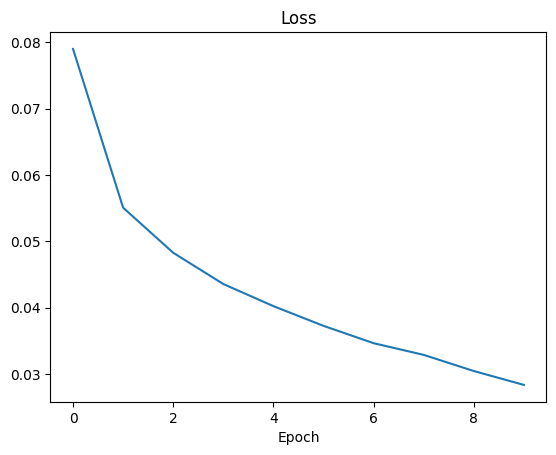

In [6]:
plt.title("Loss")
plt.xlabel("Epoch")
plt.plot(model.epoch_losees)
plt.show()